# **Name: Varun Magotra**
# **Roll Number: 14**
# **Batch: A**

# Lab 1: Study of Linear Regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
np.set_printoptions(precision = 3, suppress = True)
import warnings


# Setting Parameters for the Visualization

In [ ]:
## set matplotlib defaults;
plt.style.use('seaborn-whitegrid')
plt.rc(
    'figure', 
    autolayout = True
)
plt.rc(
    'axes', 
    labelsize = 'large', 
    labelweight = 'bold', 
    titlesize = 'large', 
    titleweight = 14, 
    titlepad = 10
)
## Mute warnings;
warnings.filterwarnings('ignore')

# <center>Data Exploration</center>

In [ ]:
df = pd.read_csv('/content/auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


# <center>Data Cleaning</center>

In [ ]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [ ]:
df = df.drop('car name',axis=1)

In [ ]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


In [ ]:
df['horsepower'] = df['horsepower'].replace(to_replace =['?'],
                 value =['0'])

In [ ]:
df["horsepower"] = pd.to_numeric(df["horsepower"], downcast="float")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float32
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float32(1), float64(3), int64(4)
memory usage: 23.4 KB


In [ ]:
df['origin'].unique()

array([1, 3, 2])

### Removing car name column

In [ ]:
df['origin'] = df['origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
df = pd.get_dummies(df, columns = ['origin'], prefix = '', prefix_sep = '')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,Europe,Japan,USA
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu,0,0,1
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320,0,0,1
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite,0,0,1
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst,0,0,1
4,17.0,8,302.0,140,3449,10.5,70,ford torino,0,0,1


In [ ]:
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
393,27.0,4,140.0,86.0,2790,15.6,82,1
394,44.0,4,97.0,52.0,2130,24.6,82,2
395,32.0,4,135.0,84.0,2295,11.6,82,1
396,28.0,4,120.0,79.0,2625,18.6,82,1
397,31.0,4,119.0,82.0,2720,19.4,82,1


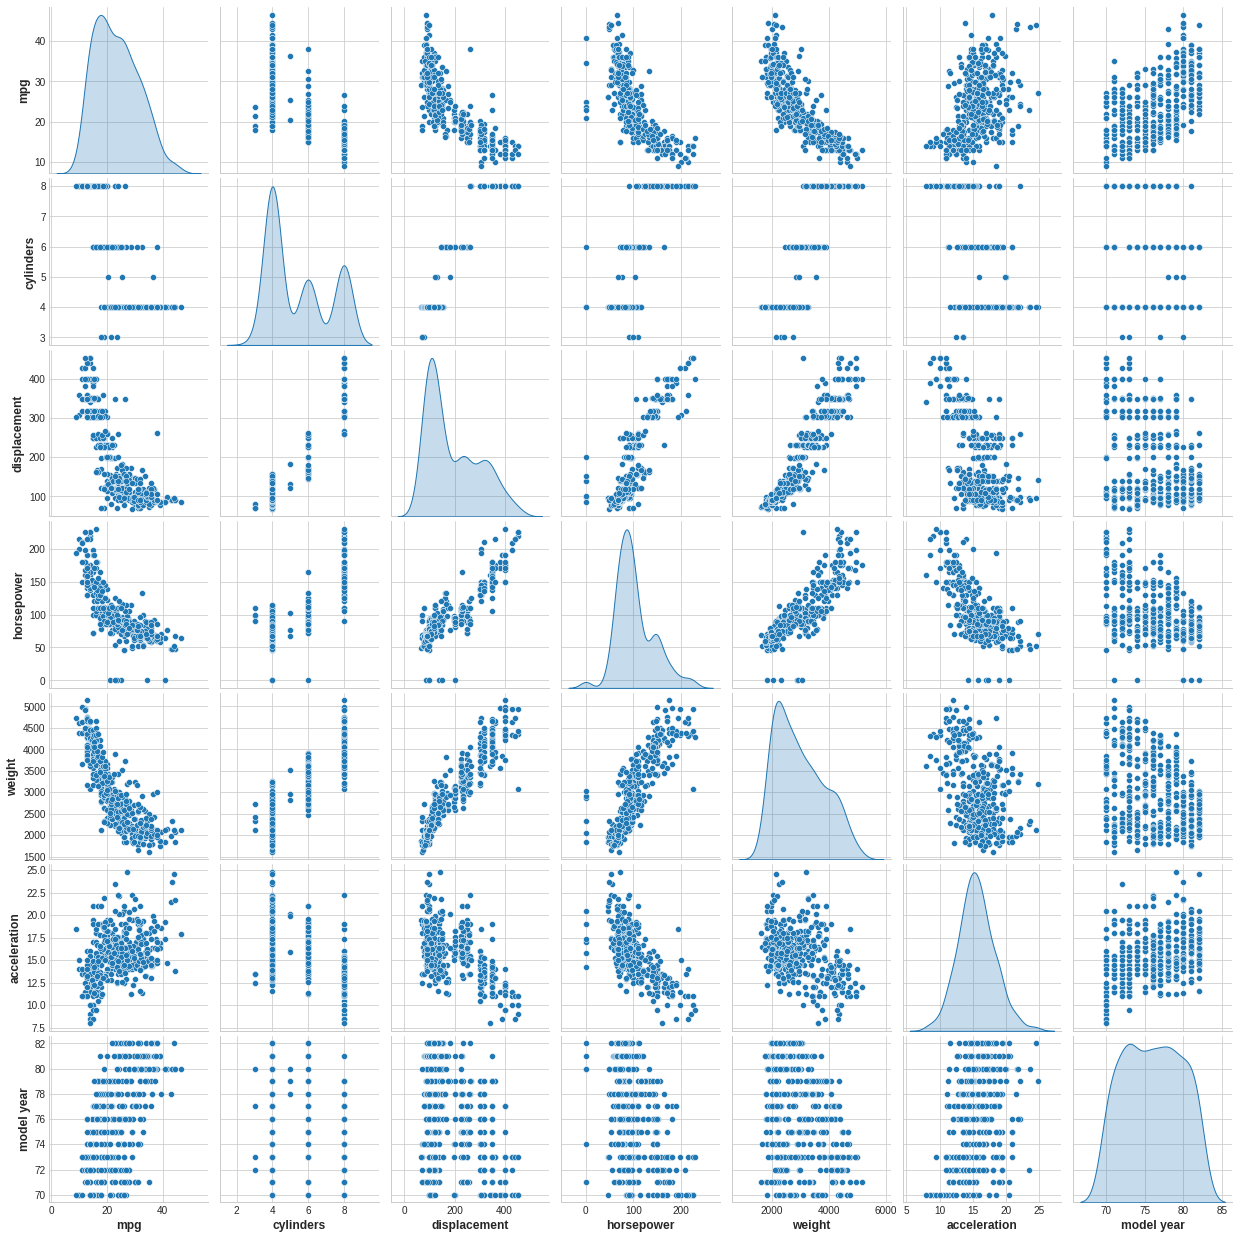

In [ ]:
attr_select = df.iloc[:,0:7]
sns.pairplot(attr_select, diag_kind='kde')

In [ ]:
df['origin'] = df['origin'].replace({1:'america',2:'europe',3:'asia'})


In [ ]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,america
1,15.0,8,350.0,165.0,3693,11.5,70,america
2,18.0,8,318.0,150.0,3436,11.0,70,america
3,16.0,8,304.0,150.0,3433,12.0,70,america
4,17.0,8,302.0,140.0,3449,10.5,70,america
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,america
394,44.0,4,97.0,52.0,2130,24.6,82,europe
395,32.0,4,135.0,84.0,2295,11.6,82,america
396,28.0,4,120.0,79.0,2625,18.6,82,america


### Creating Dummy Variables

In [ ]:
df = pd.get_dummies(df, columns=['origin'])
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,0,0
394,44.0,4,97.0,52.0,2130,24.6,82,0,0,1
395,32.0,4,135.0,84.0,2295,11.6,82,1,0,0
396,28.0,4,120.0,79.0,2625,18.6,82,1,0,0


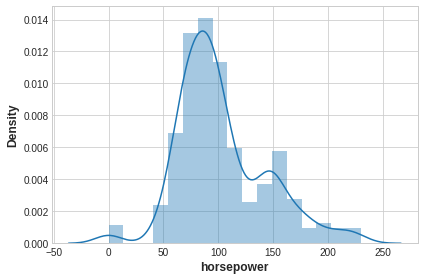

In [ ]:
sns.distplot(df['horsepower'])


In [ ]:
# independent variables
X = df.drop(['mpg'], axis=1)
# dependent variable
y = df['mpg']

In [ ]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,398.0,102.894470,40.269558,0.0,75.000,92.0,125.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin_america,398.0,0.625628,0.484569,0.0,0.000,1.0,1.000,1.0
origin_asia,398.0,0.198492,0.399367,0.0,0.000,0.0,0.000,1.0
origin_europe,398.0,0.175879,0.381197,0.0,0.000,0.0,0.000,1.0


In [ ]:
## Normalize the data;
X.describe().transpose()[['mean', 'std']]

,mean,std
cylinders,5.454774,1.701004
displacement,193.425879,104.269838
horsepower,102.894470,40.269558
weight,2970.424623,846.841774
acceleration,15.568090,2.757689
model year,76.010050,3.697627
origin_america,0.625628,0.484569
origin_asia,0.198492,0.399367
origin_europe,0.175879,0.381197


In [ ]:
X

,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
0,8,307.0,130.0,3504,12.0,70,1,0,0
1,8,350.0,165.0,3693,11.5,70,1,0,0
2,8,318.0,150.0,3436,11.0,70,1,0,0
3,8,304.0,150.0,3433,12.0,70,1,0,0
4,8,302.0,140.0,3449,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82,1,0,0
394,4,97.0,52.0,2130,24.6,82,0,0,1
395,4,135.0,84.0,2295,11.6,82,1,0,0
396,4,120.0,79.0,2625,18.6,82,1,0,0


## Data Partition (80% for training and 20% for testing) (Use scikit-learn)


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20, random_state=1)


In [ ]:
from sklearn.linear_model import LinearRegression, Mul
from sklearn.metrics import mean_squared_error

# Building Model

In [ ]:
liner_reg=LinearRegression()
liner_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
liner_reg.coef_

array([-0.286,  0.023, -0.012, -0.007,  0.127,  0.83 , -1.836,  0.861,
        0.976])

# Linear Regression Coefficient for Each Feature

In [ ]:
for indx,col_name in enumerate(X_train.columns):
    print("Coefficient of  {} is {}".format(col_name,liner_reg.coef_[indx]))

Coefficient of  cylinders is -0.2858795443315158
Coefficient of  displacement is 0.02269656866601264
Coefficient of  horsepower is -0.012471334139603996
Coefficient of  weight is -0.007068901494232531
Coefficient of  acceleration is 0.12717029722669257
Coefficient of  model year is 0.8298433201591543
Coefficient of  origin_america is -1.8362586954140587
Coefficient of  origin_asia is 0.8605289475526543
Coefficient of  origin_europe is 0.9757297478614051


In [ ]:
intercept = liner_reg.intercept_
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -21.293794404354554


In [ ]:
liner_reg.score(X_test,y_test)

0.8658634718706945

In [ ]:
y_pred = liner_reg.predict(X_test)

# Evaluate the model

In [ ]:
import math as mt

mse = mean_squared_error(y_test,y_pred)

rmse = mt.sqrt(mse)

print(rmse)

2.749073059925999


# **MultiClass Linear Regression**

In [ ]:
train_labels = y_train.copy()
test_labels = y_test.copy()
# train = X_train.drop(columns = ['mpg'])
# test = test_df.drop(columns = ['mpg'])

In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x_train = min_max_scaler.fit_transform(X_train.values)
x_test = min_max_scaler.transform(X_test.values)

In [ ]:
from sklearn.linear_model import LinearRegression
multi_regr = LinearRegression()
  
multi_regr.fit(x_train, train_labels)


LinearRegression()

In [ ]:
multi_regr.coef_

array([-1.575e+00,  8.638e+00, -2.853e+00, -2.488e+01,  1.977e+00,
        9.939e+00, -1.366e+14, -1.366e+14, -1.366e+14])

In [ ]:
for indx,col_name in enumerate(X_train.columns):
    print("Coefficient of  {} is {}".format(col_name,multi_regr.coef_[indx]))

Coefficient of  cylinders is -1.574942462419698
Coefficient of  displacement is 8.63807940152104
Coefficient of  horsepower is -2.8533065972993557
Coefficient of  weight is -24.876842658542284
Coefficient of  acceleration is 1.9765899120798596
Coefficient of  model year is 9.938573339359033
Coefficient of  origin_america is -136604659745549.27
Coefficient of  origin_asia is -136604659745546.61
Coefficient of  origin_europe is -136604659745546.44


In [ ]:
multi_regr.score(X_test,y_test)

-103803272.03178293

In [ ]:
y_pred = multi_regr.predict(X_test)

In [ ]:
import math as mt

mse = mean_squared_error(y_test,y_pred)

rmse = mt.sqrt(mse)

print(rmse)

76474.78681957994


# **Conclusion:** 

1. Auto MPG data consists of null values in horsepower column which filled by median give better peroformance for regression model. The regression score for this model came out to be 0.8658.
2. The coefficient of regression model suggest that weight and origin of the vehicle plays an important role in predicting the MPG value.
